<a href="https://colab.research.google.com/github/ShakutaiGit/Simulation_for_stocks_value/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question Number 1

imports

In [2]:
!pip install yfinance
import scipy.stats as st
import functools
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 12.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


getting the data from yfinance

In [40]:
portfolio_composition = ['BMY','CVS','DAL','FB','UG','SWKS','MUV']
start_date = "2013-01-01"
end_date =  "2021-12-31"
def get_data():
  res = pd.DataFrame({})
  for t in portfolio_composition:
    name = t
    ticker = yfinance.Ticker(name)
    data = ticker.history(interval="1d",start=start_date, end=end_date)
    data['return_%s' % (name)] = data['Close'].pct_change(1)
    res = res.join(data[['return_%s' % (name)]],how="outer").dropna()
  return res
returns = get_data()
print(returns['return_BMY'])

Date
2013-01-03    0.016203
2013-01-04    0.003309
2013-01-07    0.001499
2013-01-08    0.002694
2013-01-09    0.005674
                ...   
2021-08-31   -0.005208
2021-09-01   -0.015704
2021-09-02    0.004711
2021-09-03   -0.007713
2021-09-30   -0.015965
Name: return_BMY, Length: 2184, dtype: float64


pre processing 

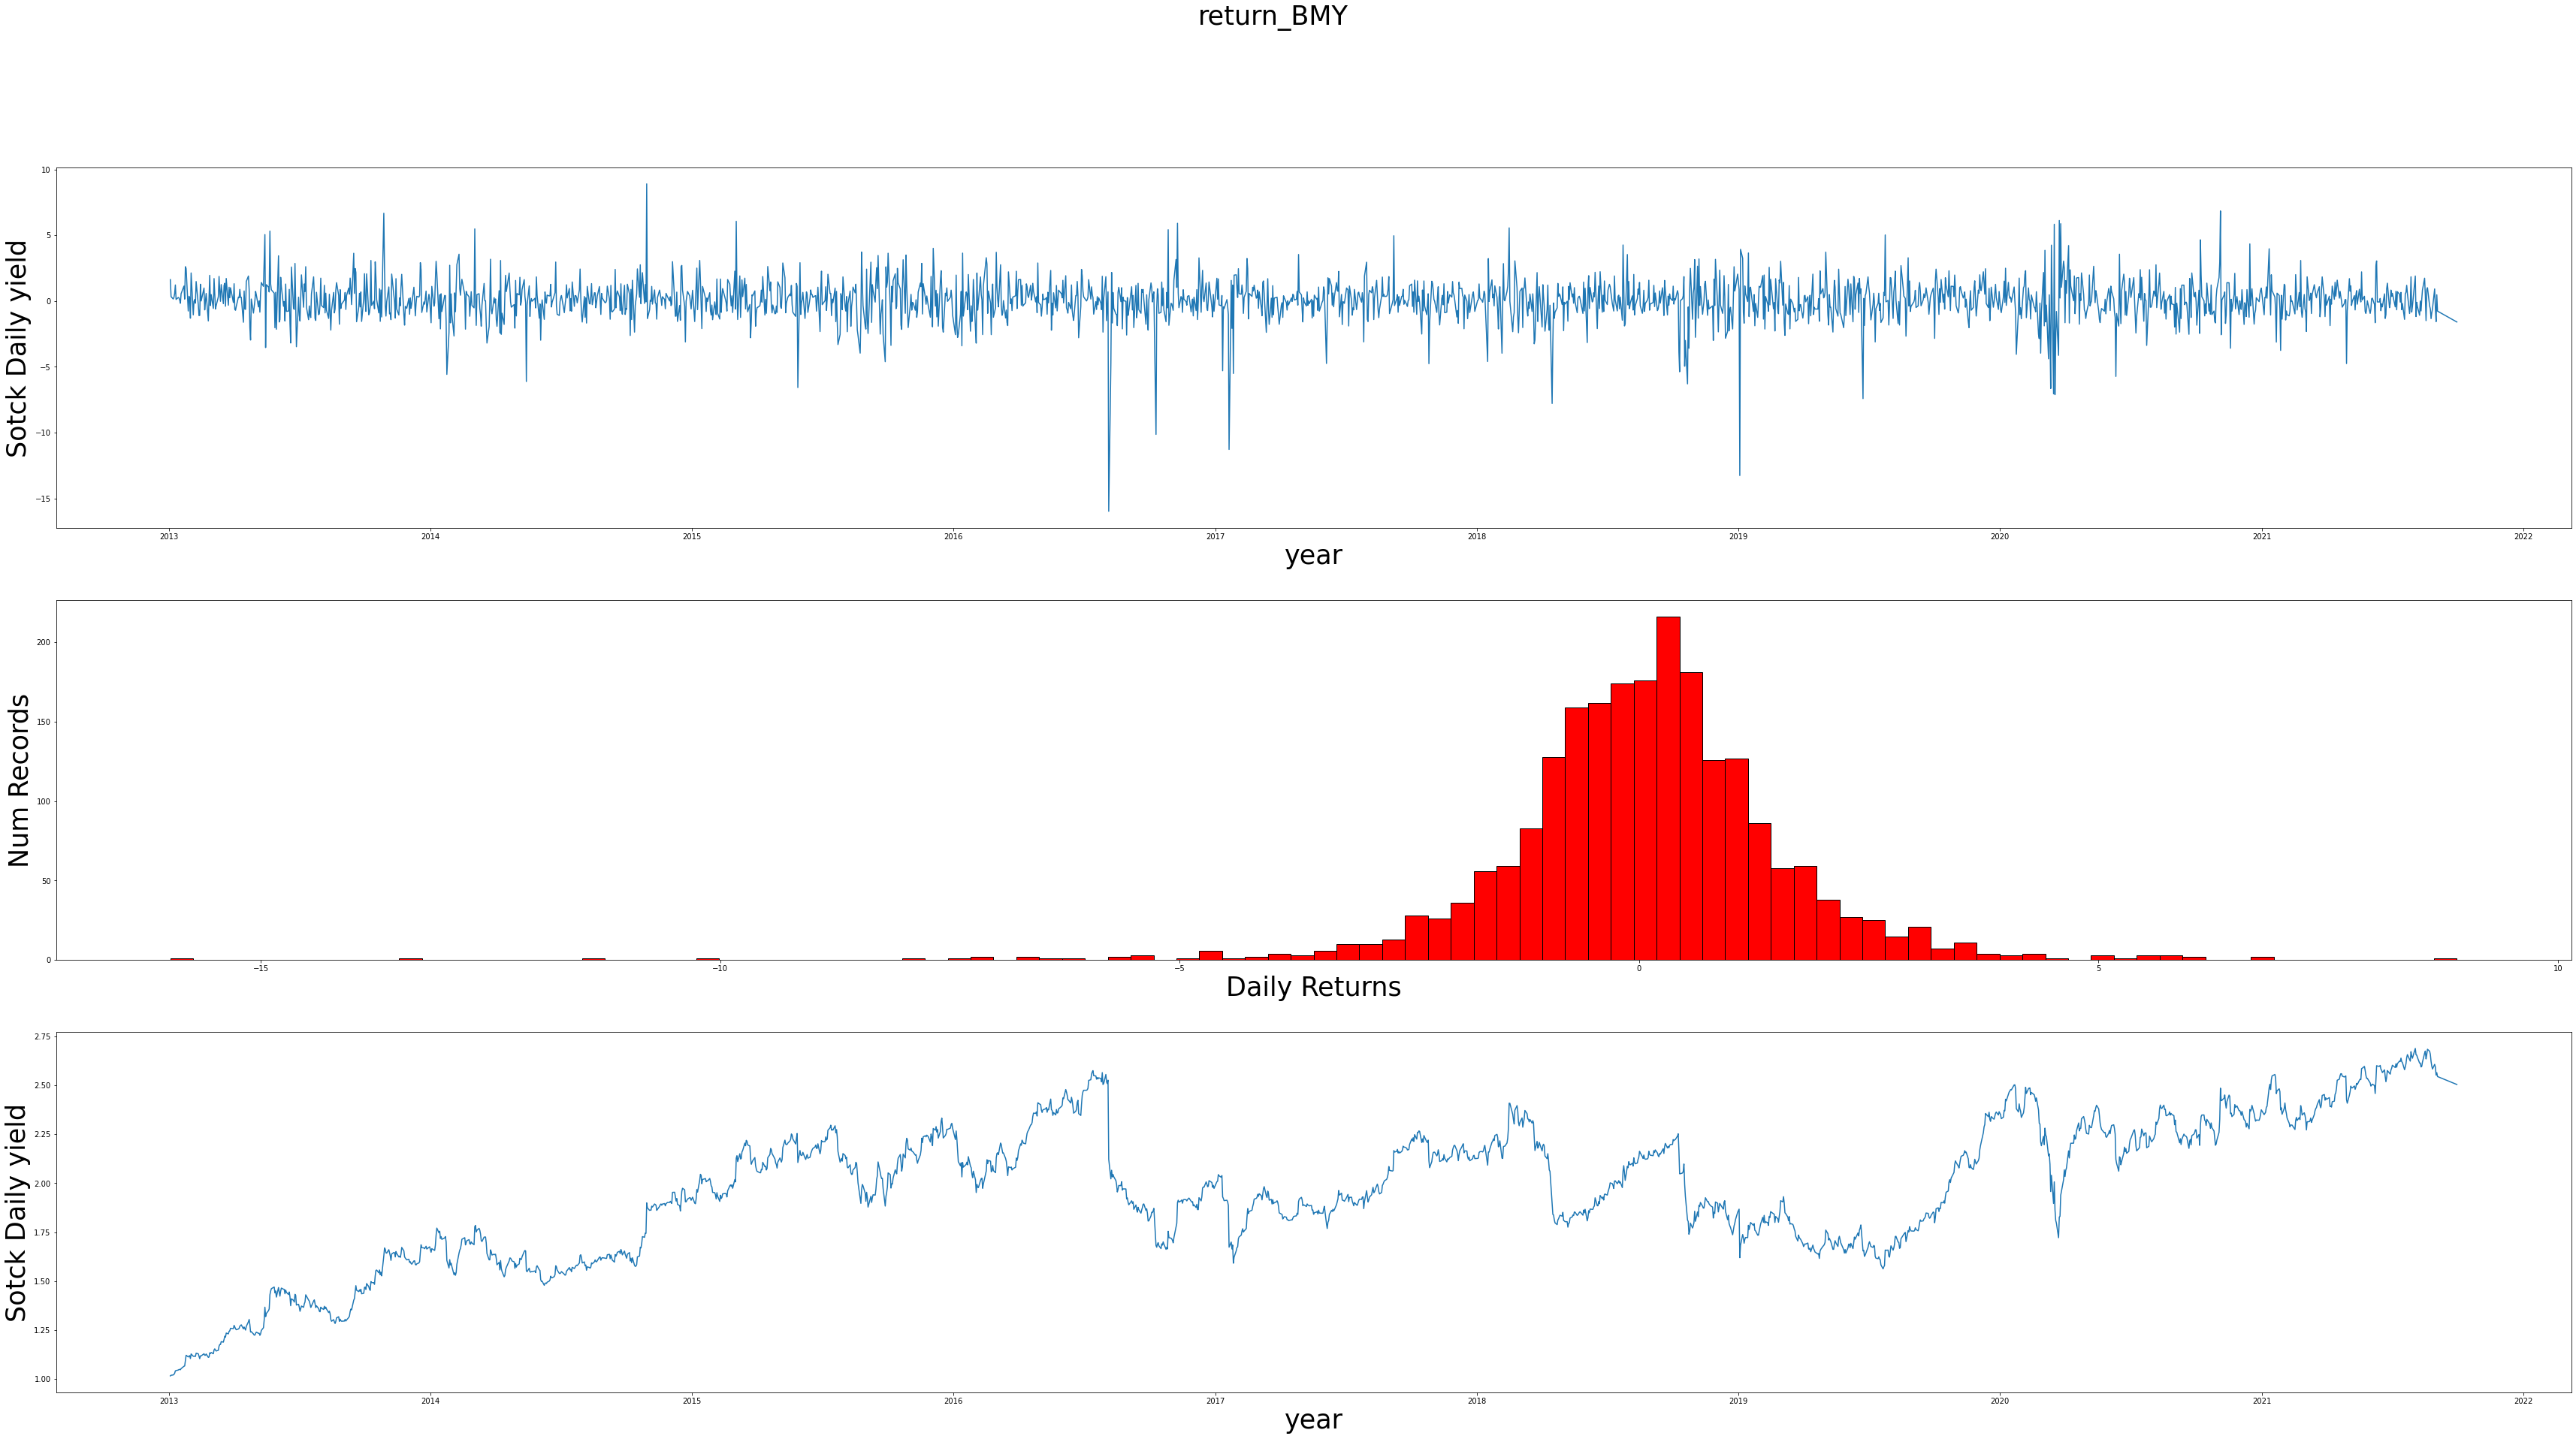

[*********************100%***********************]  1 of 1 completed


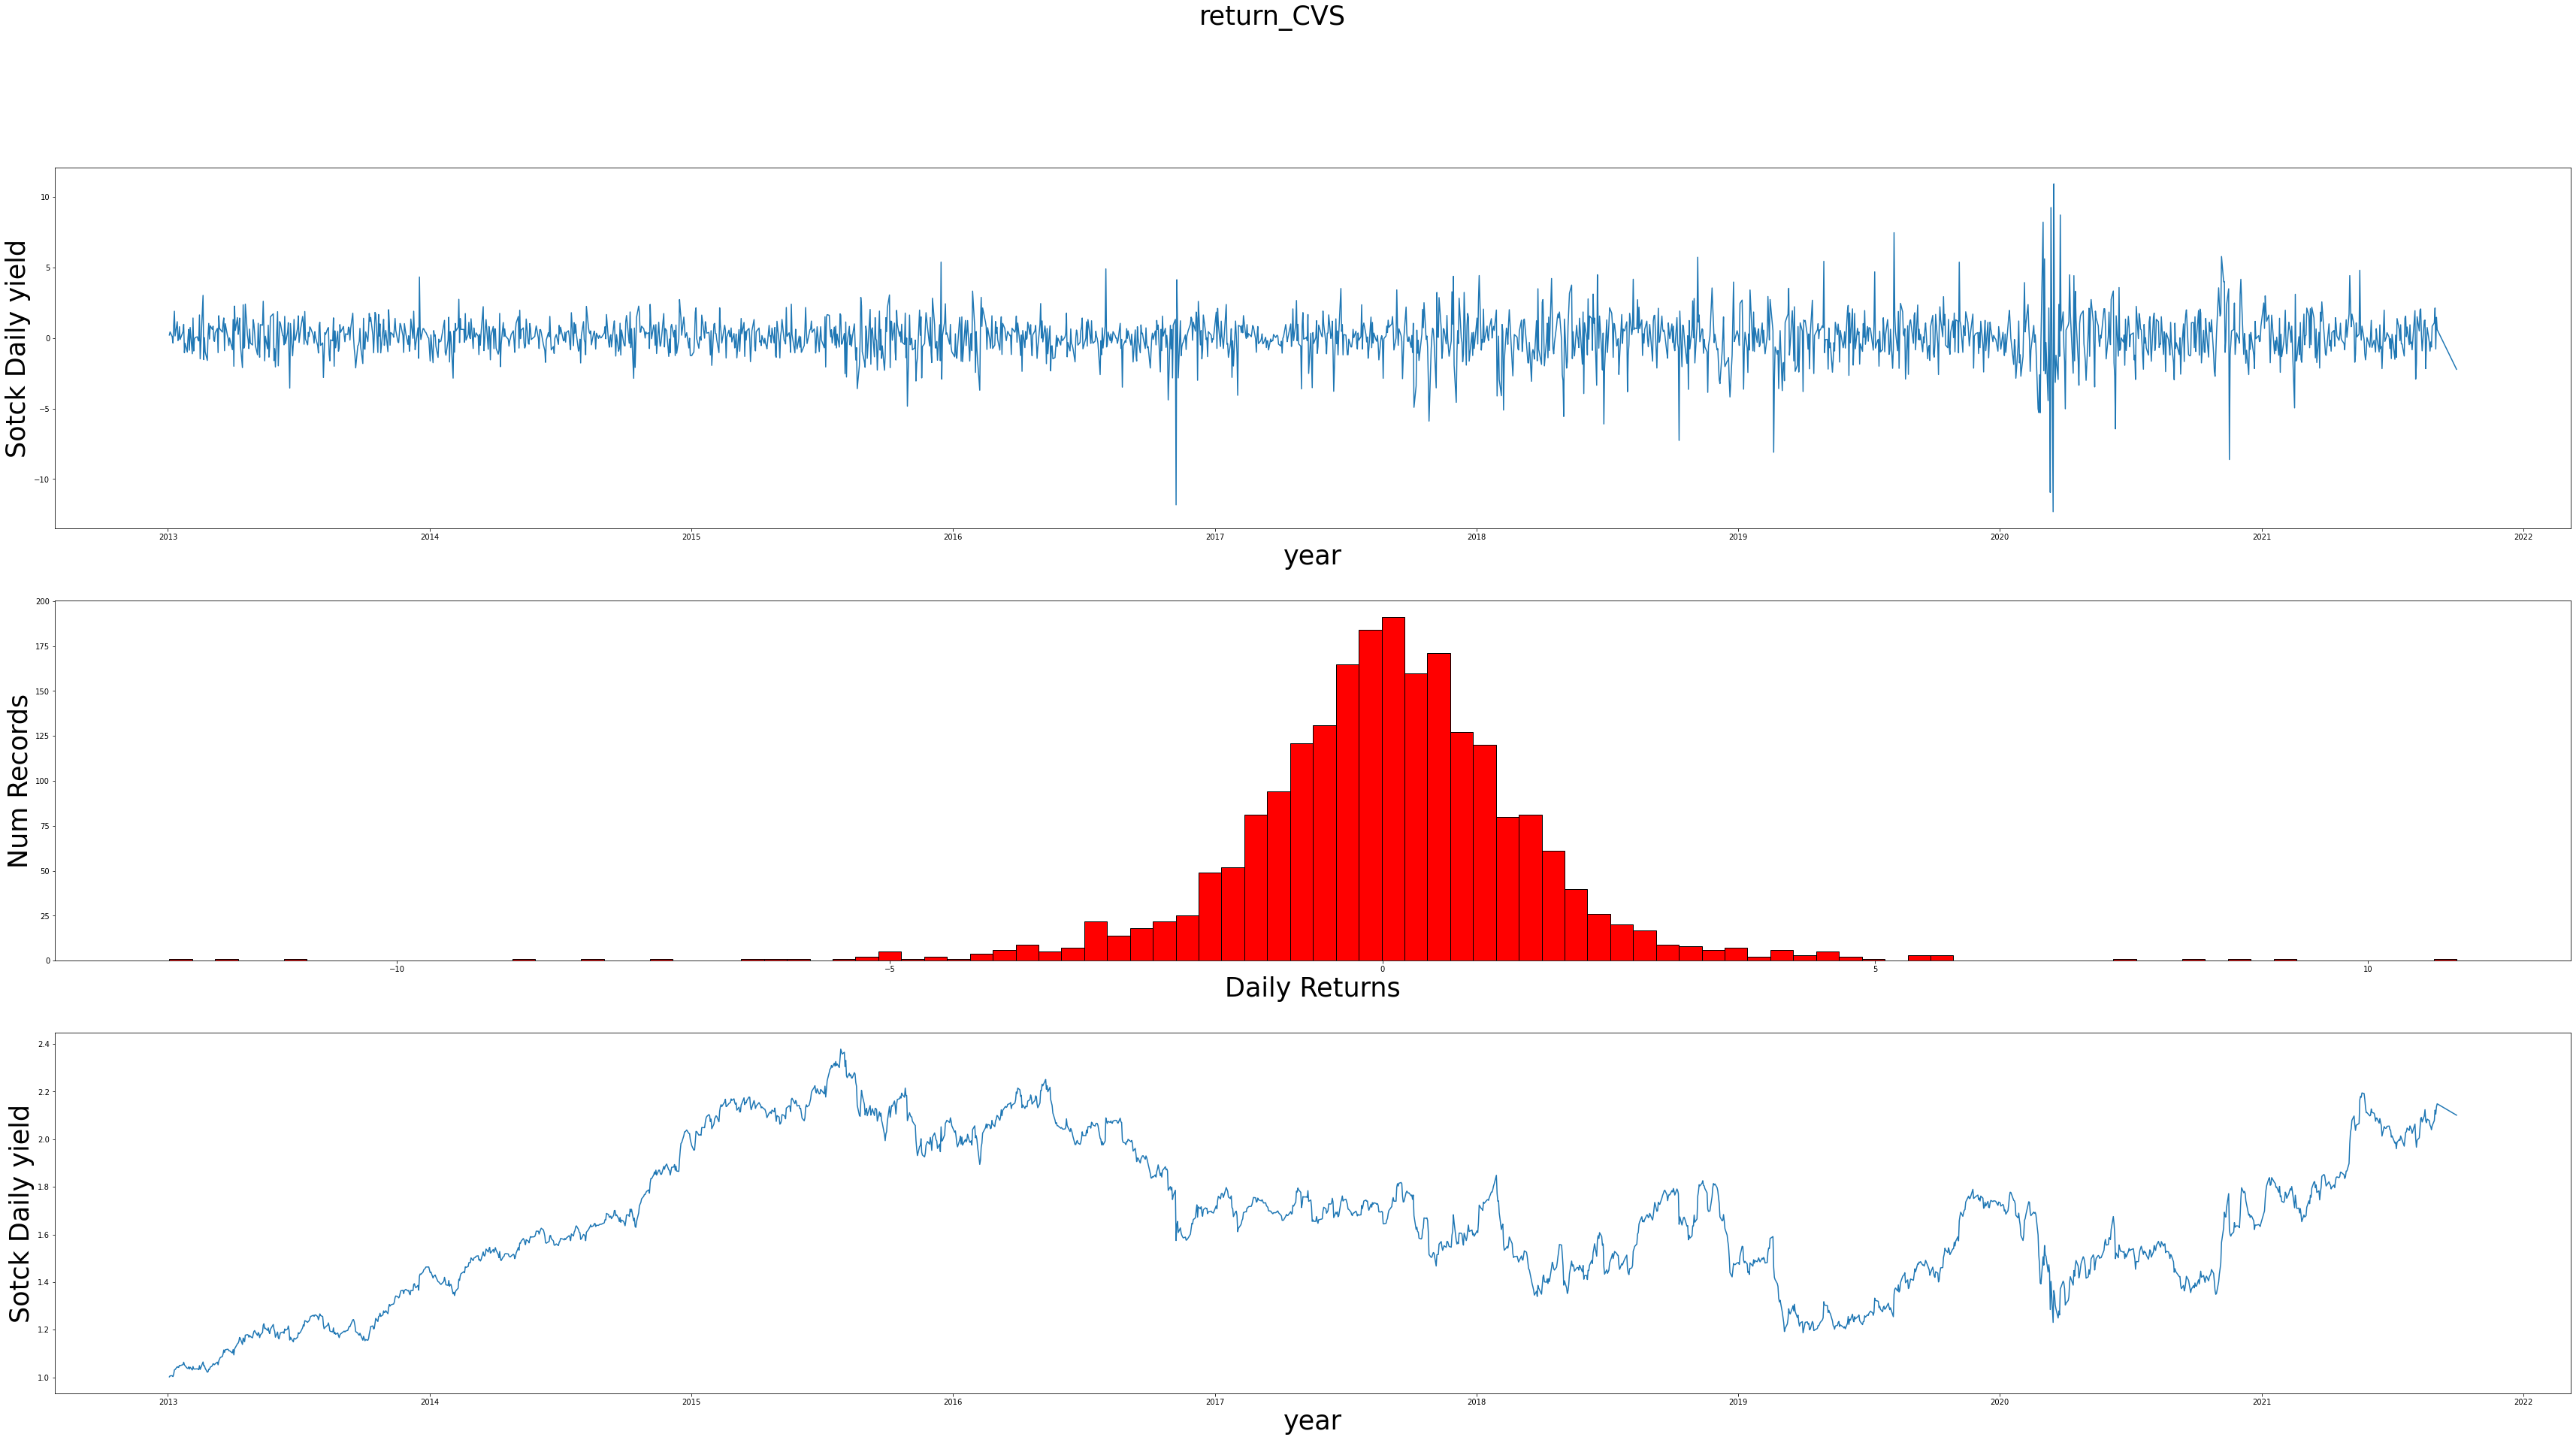

[*********************100%***********************]  1 of 1 completed


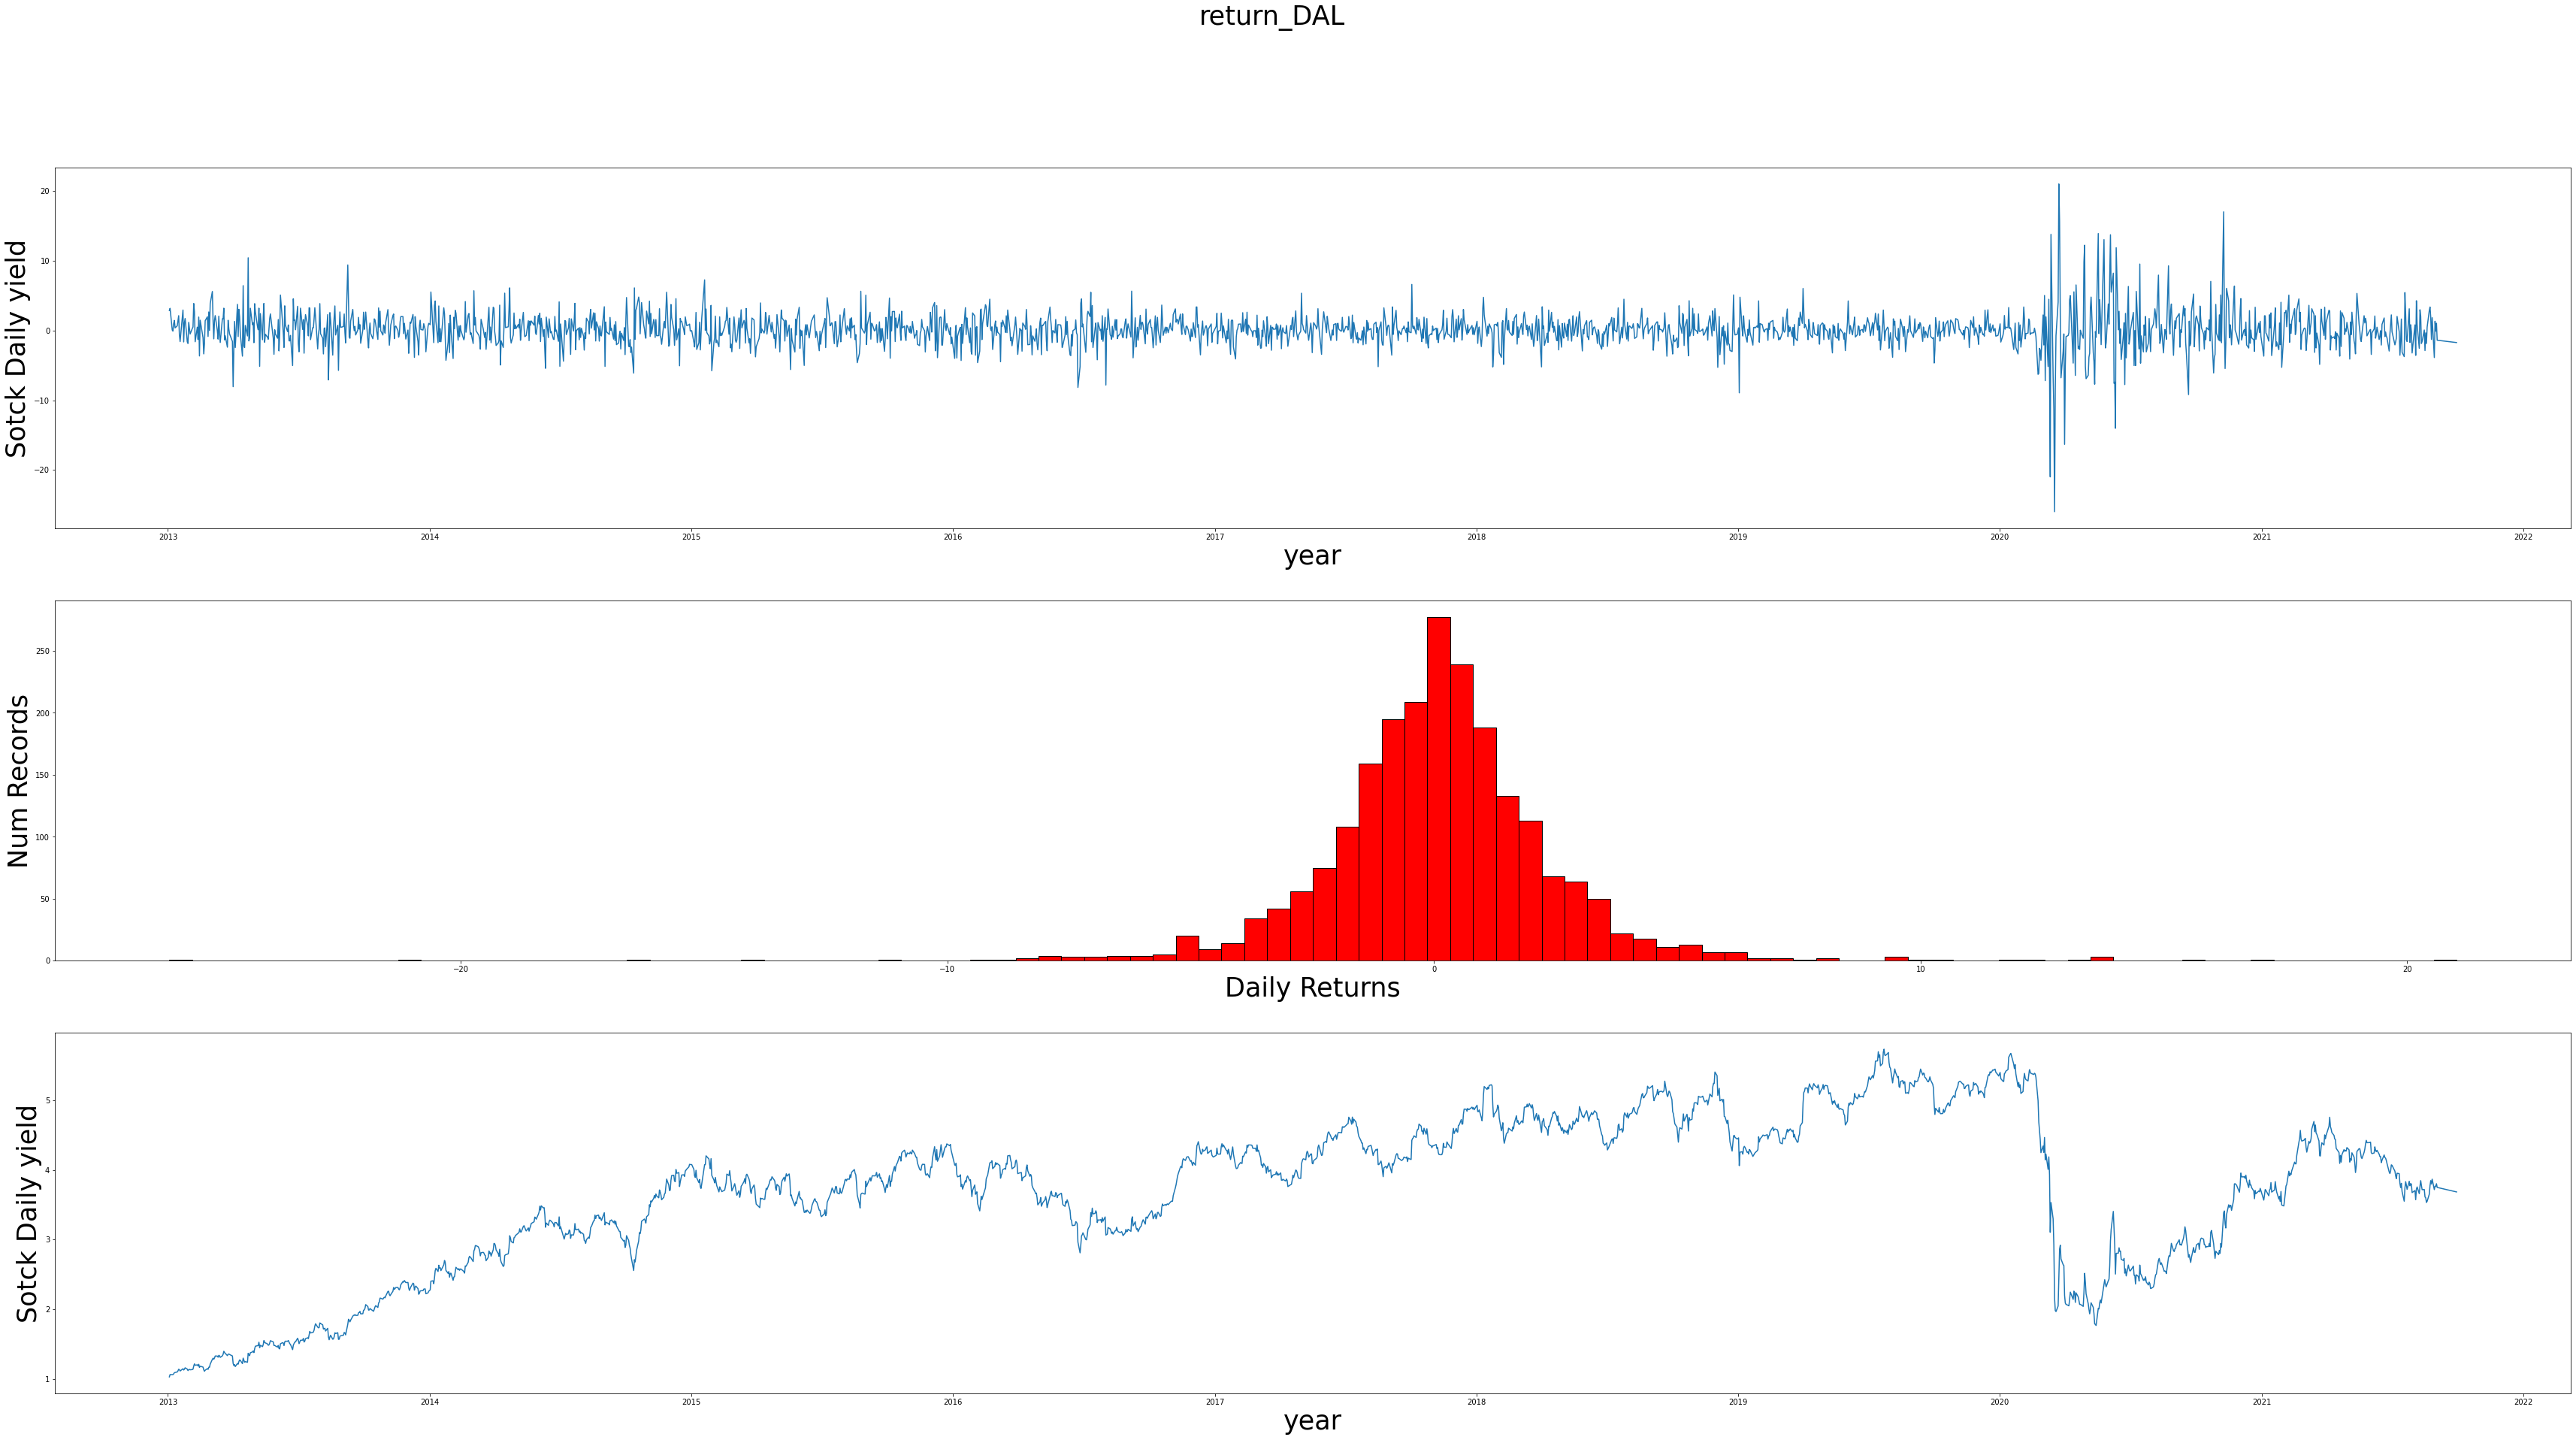

[*********************100%***********************]  1 of 1 completed


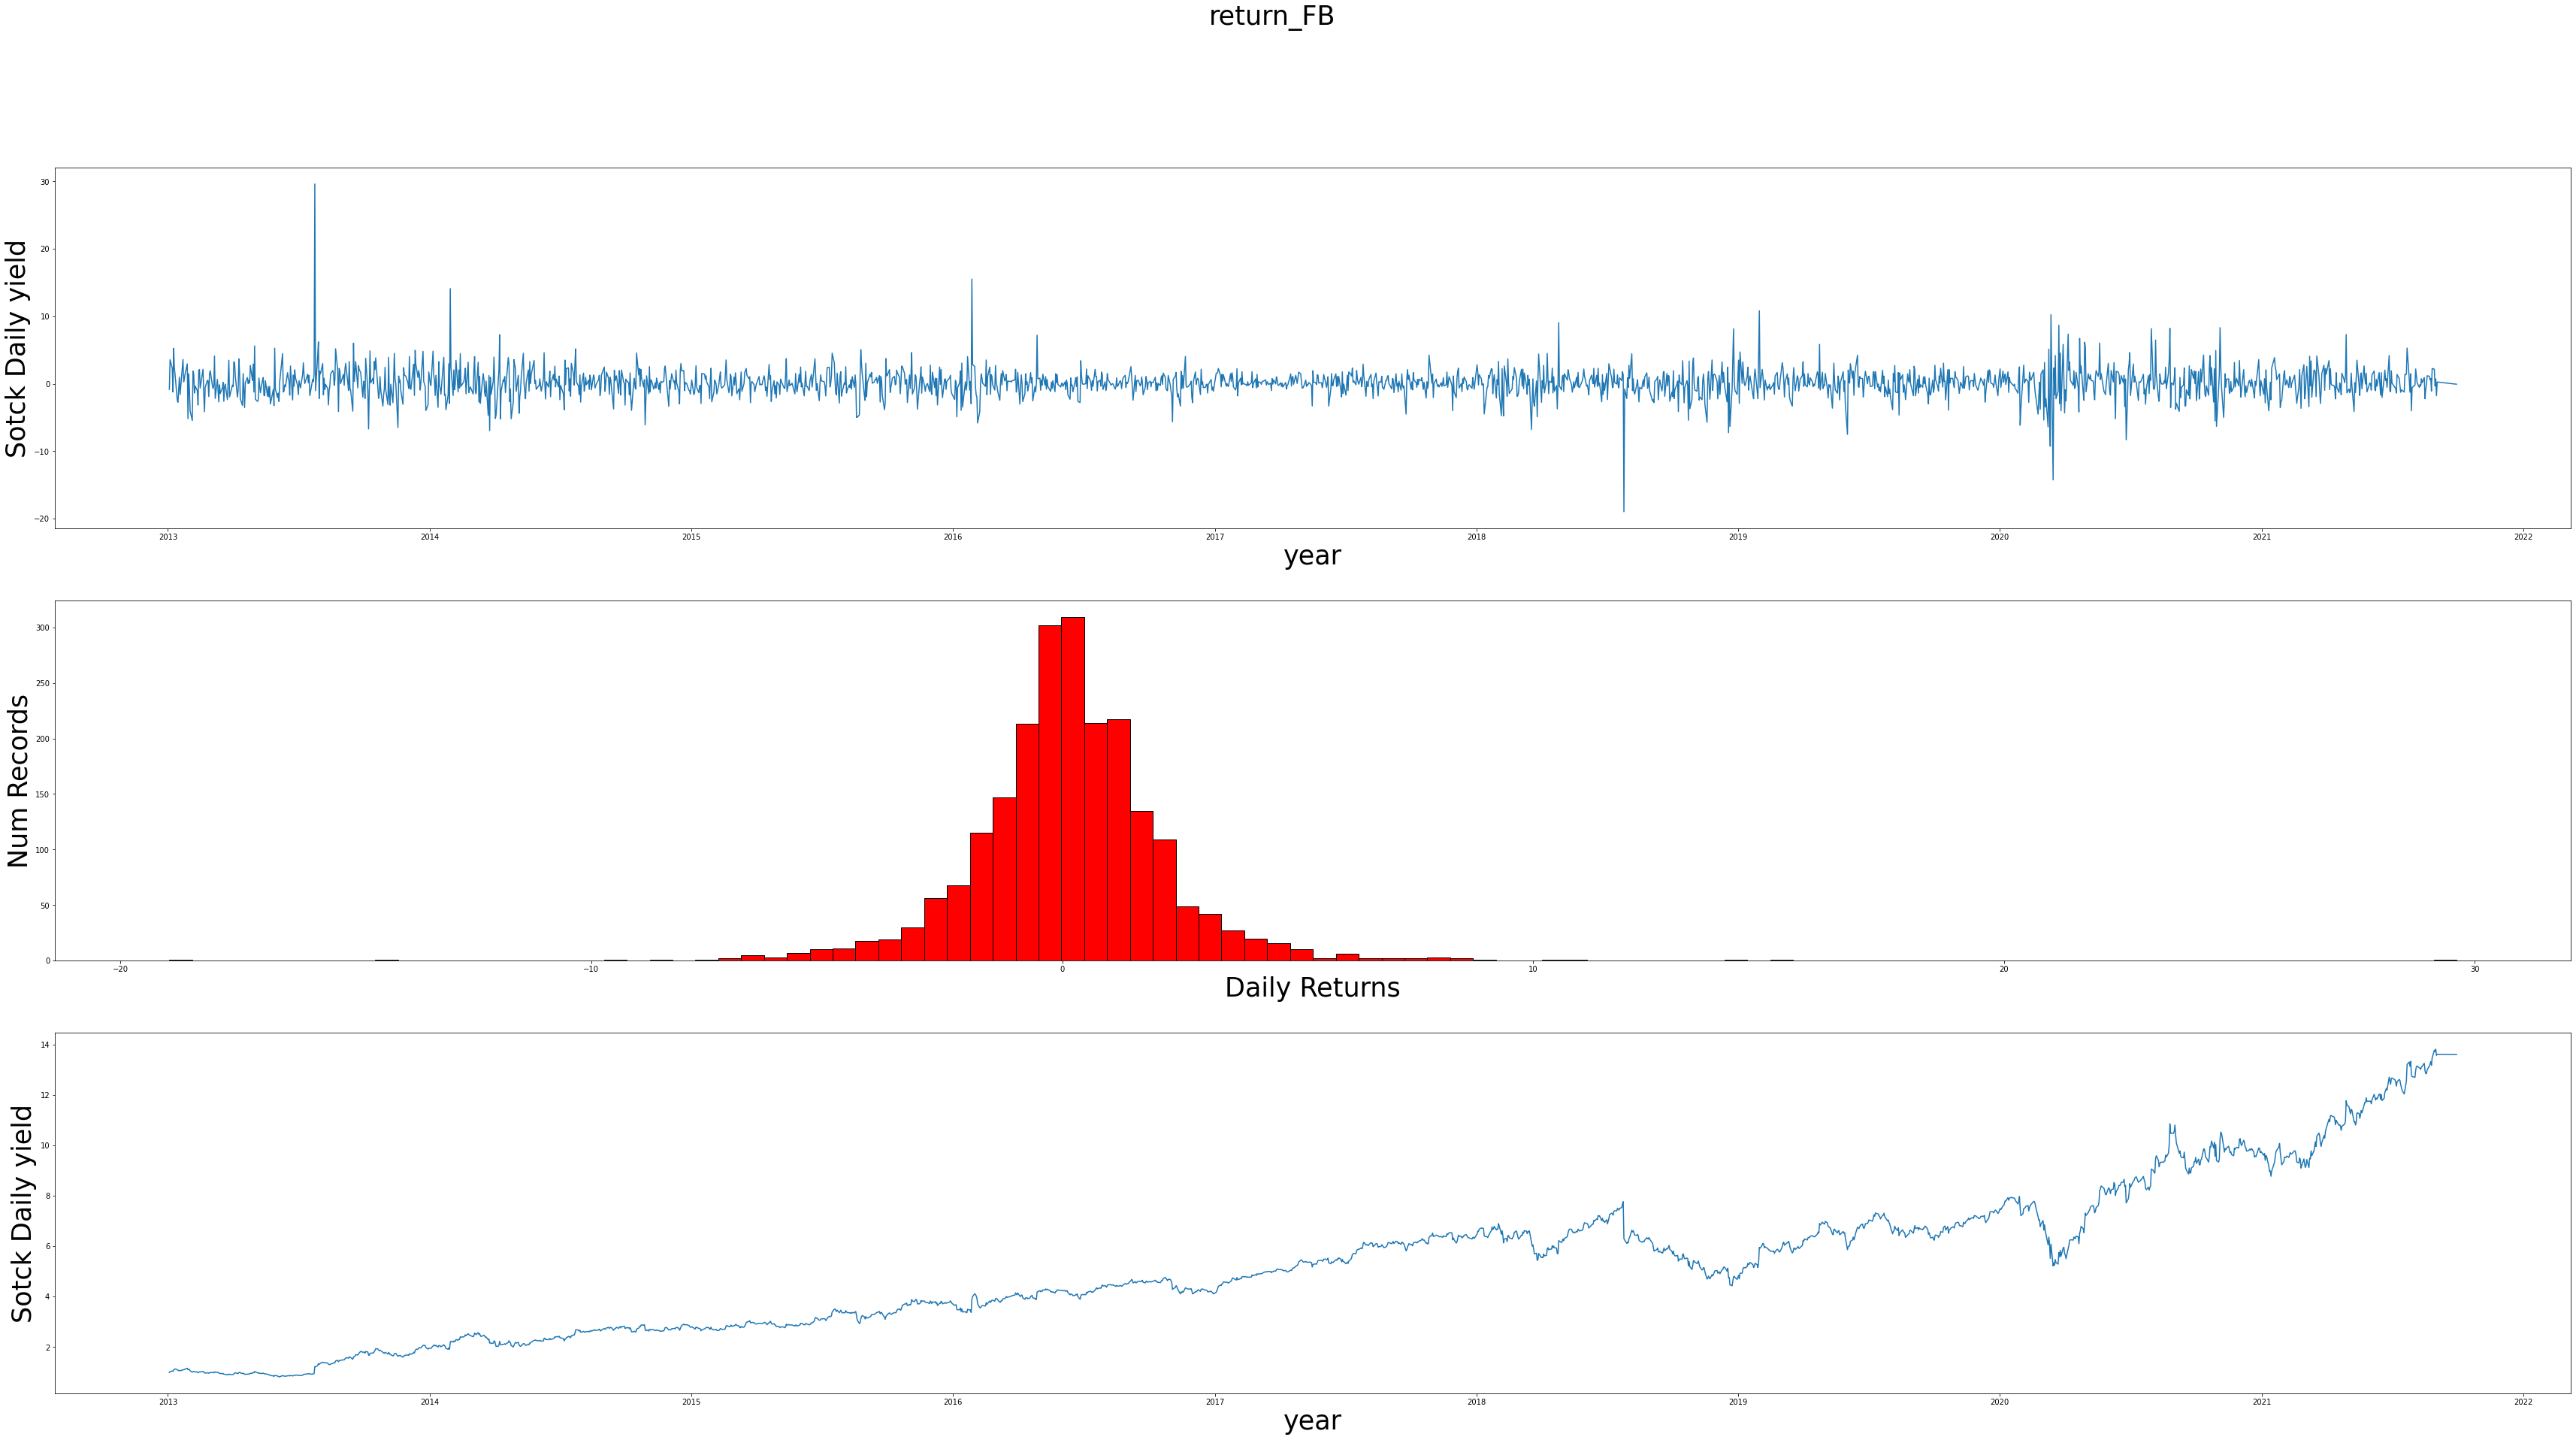

[*********************100%***********************]  1 of 1 completed


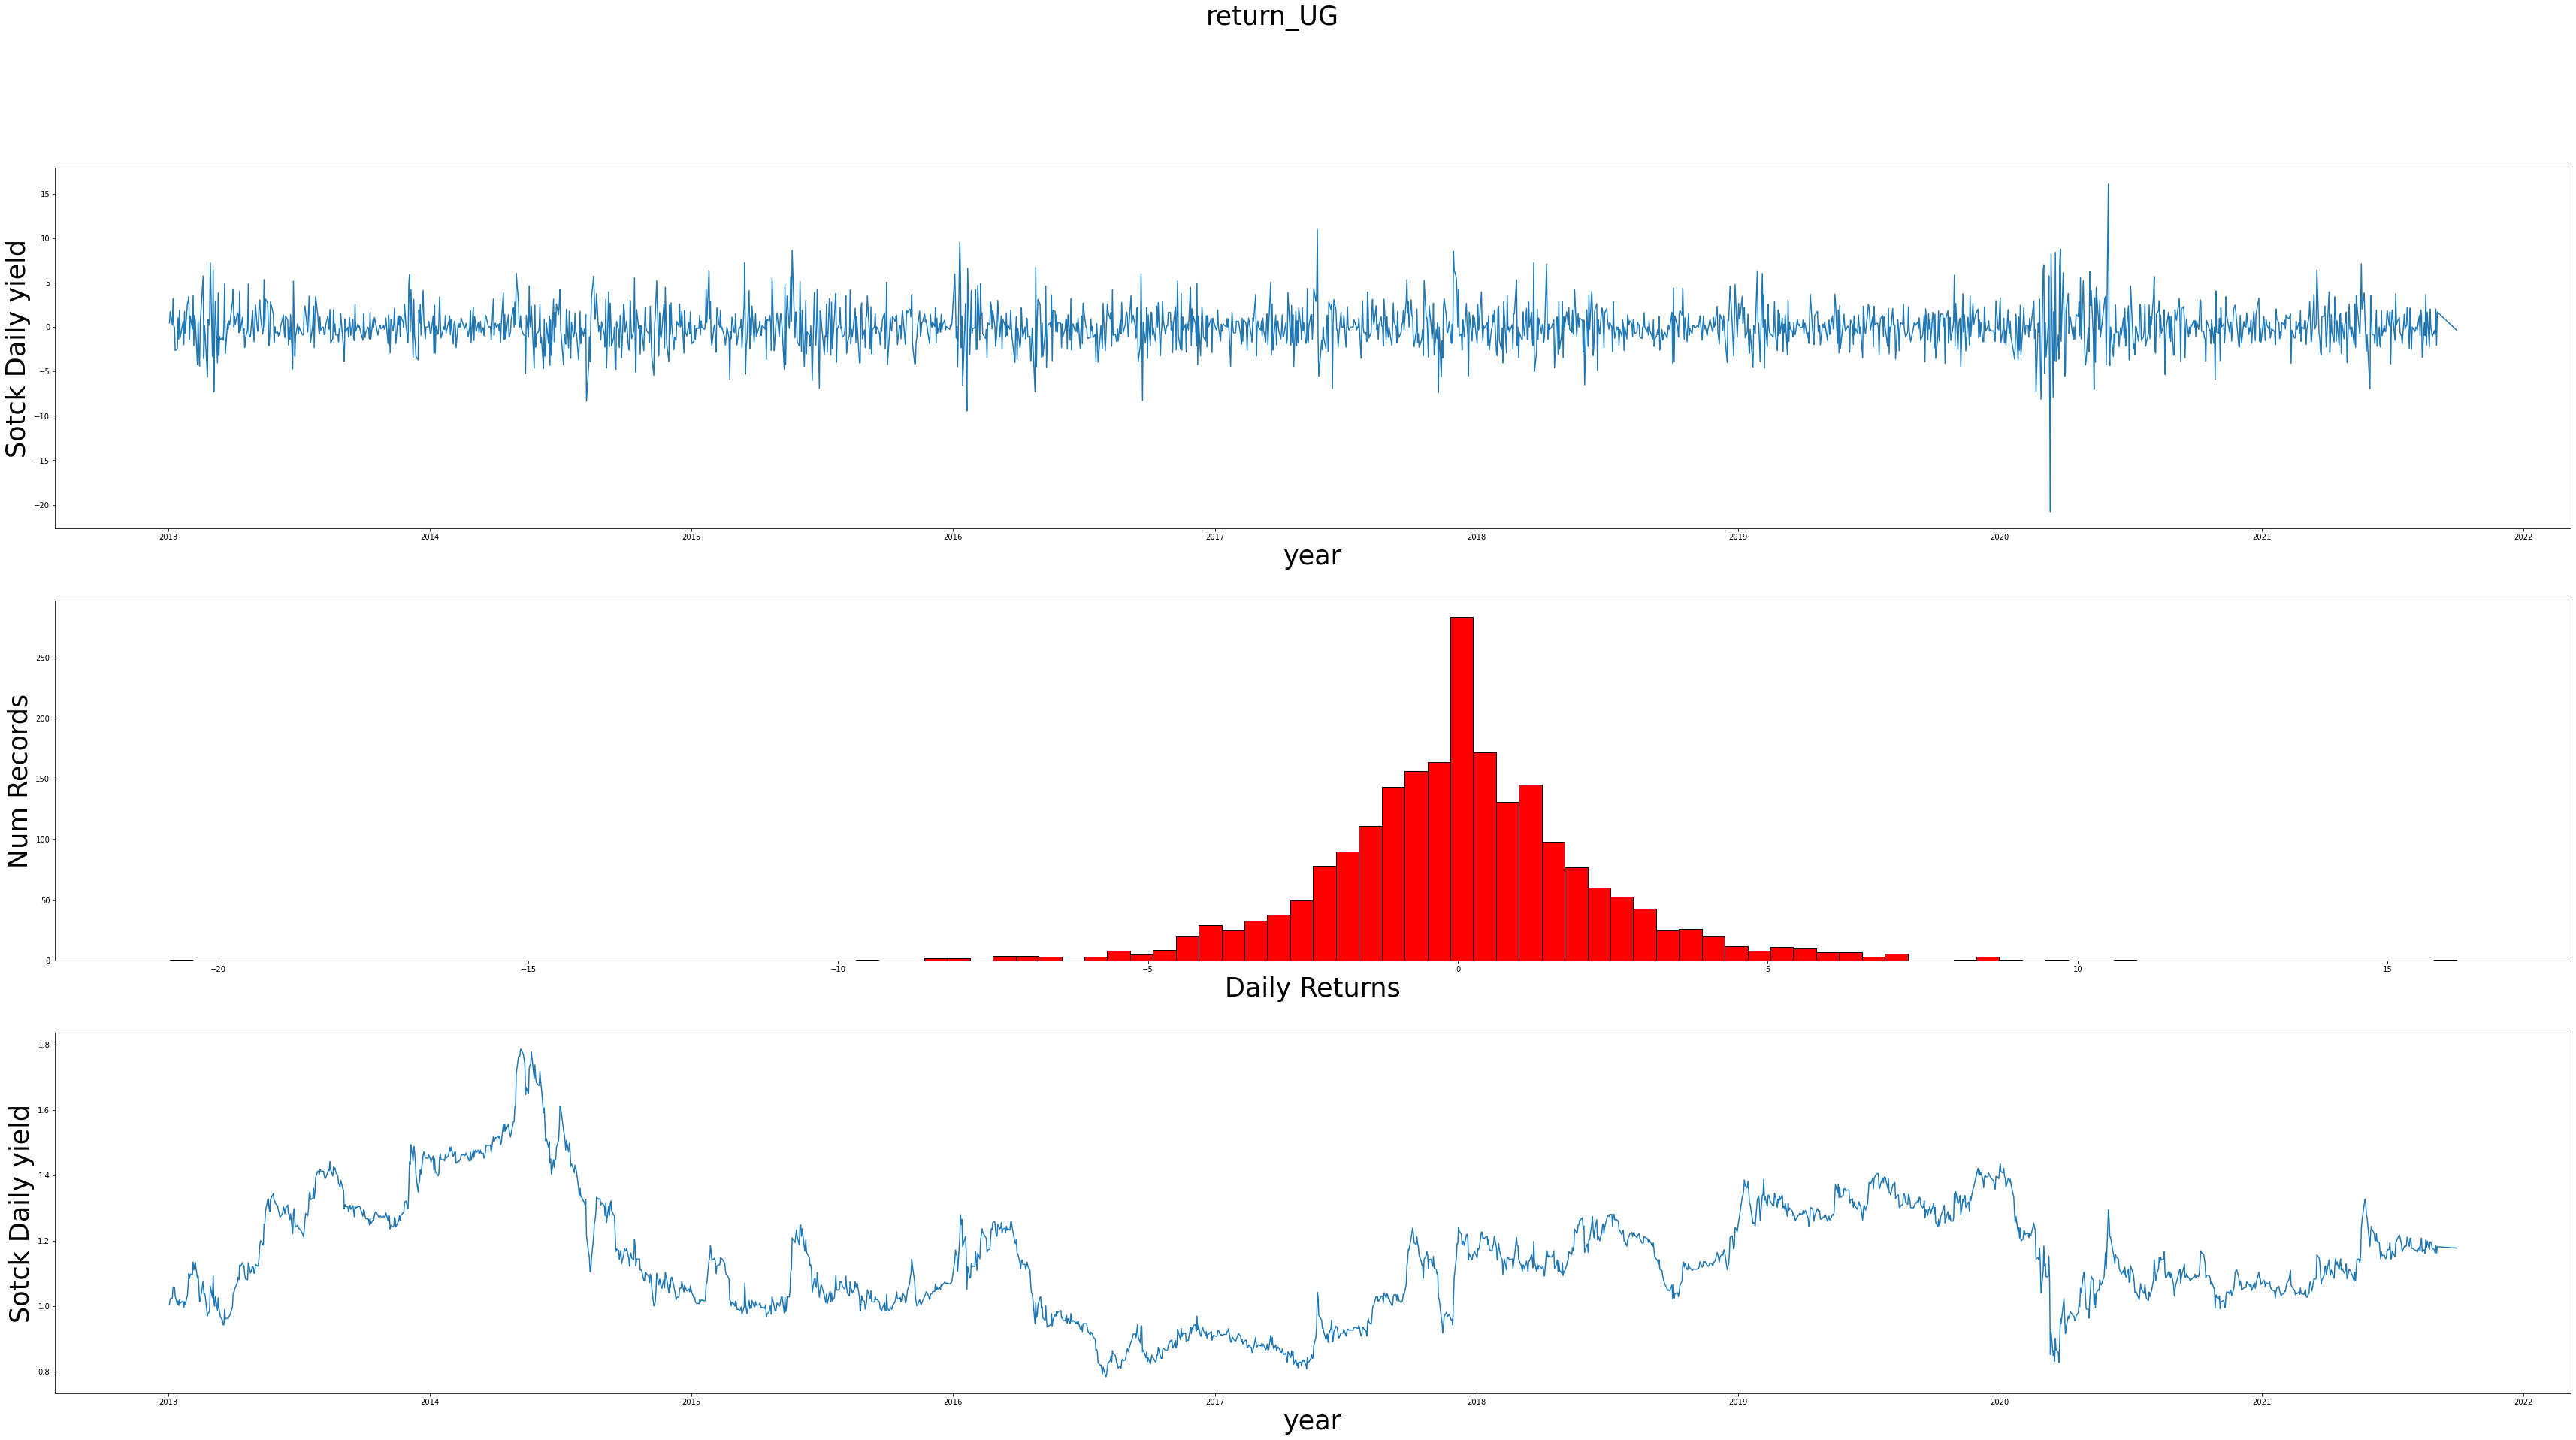

[*********************100%***********************]  1 of 1 completed


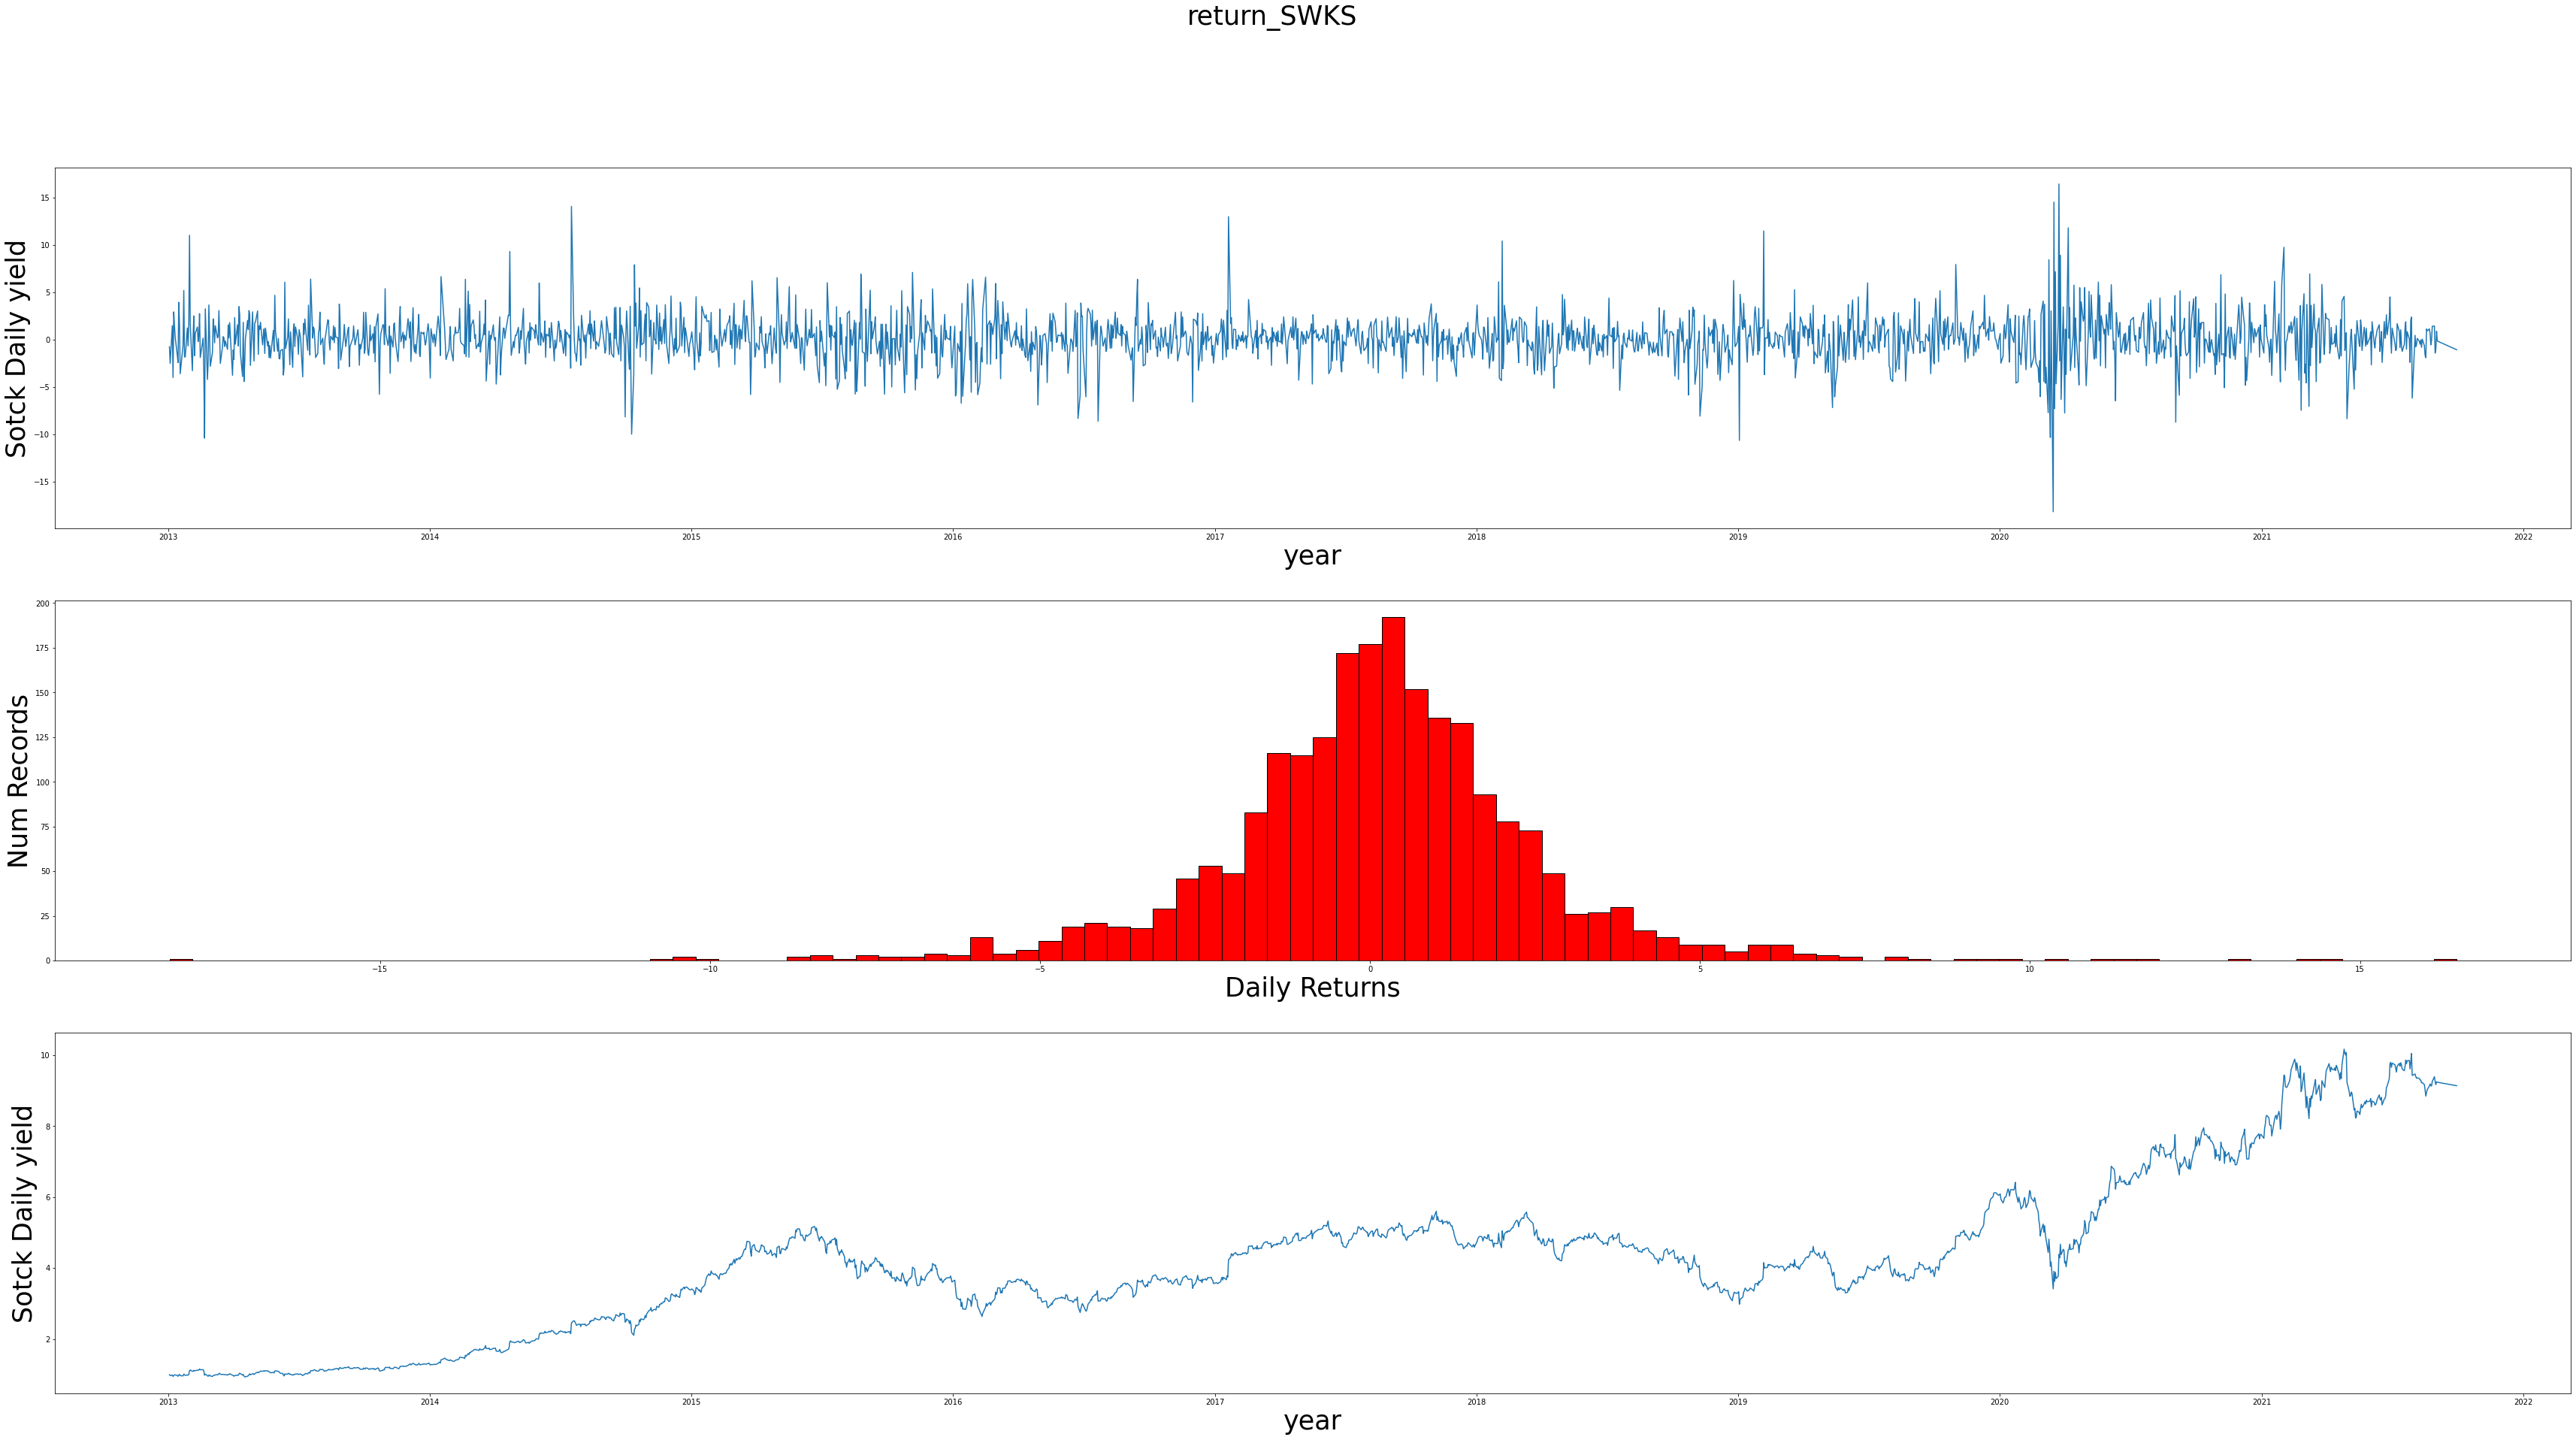

[*********************100%***********************]  1 of 1 completed


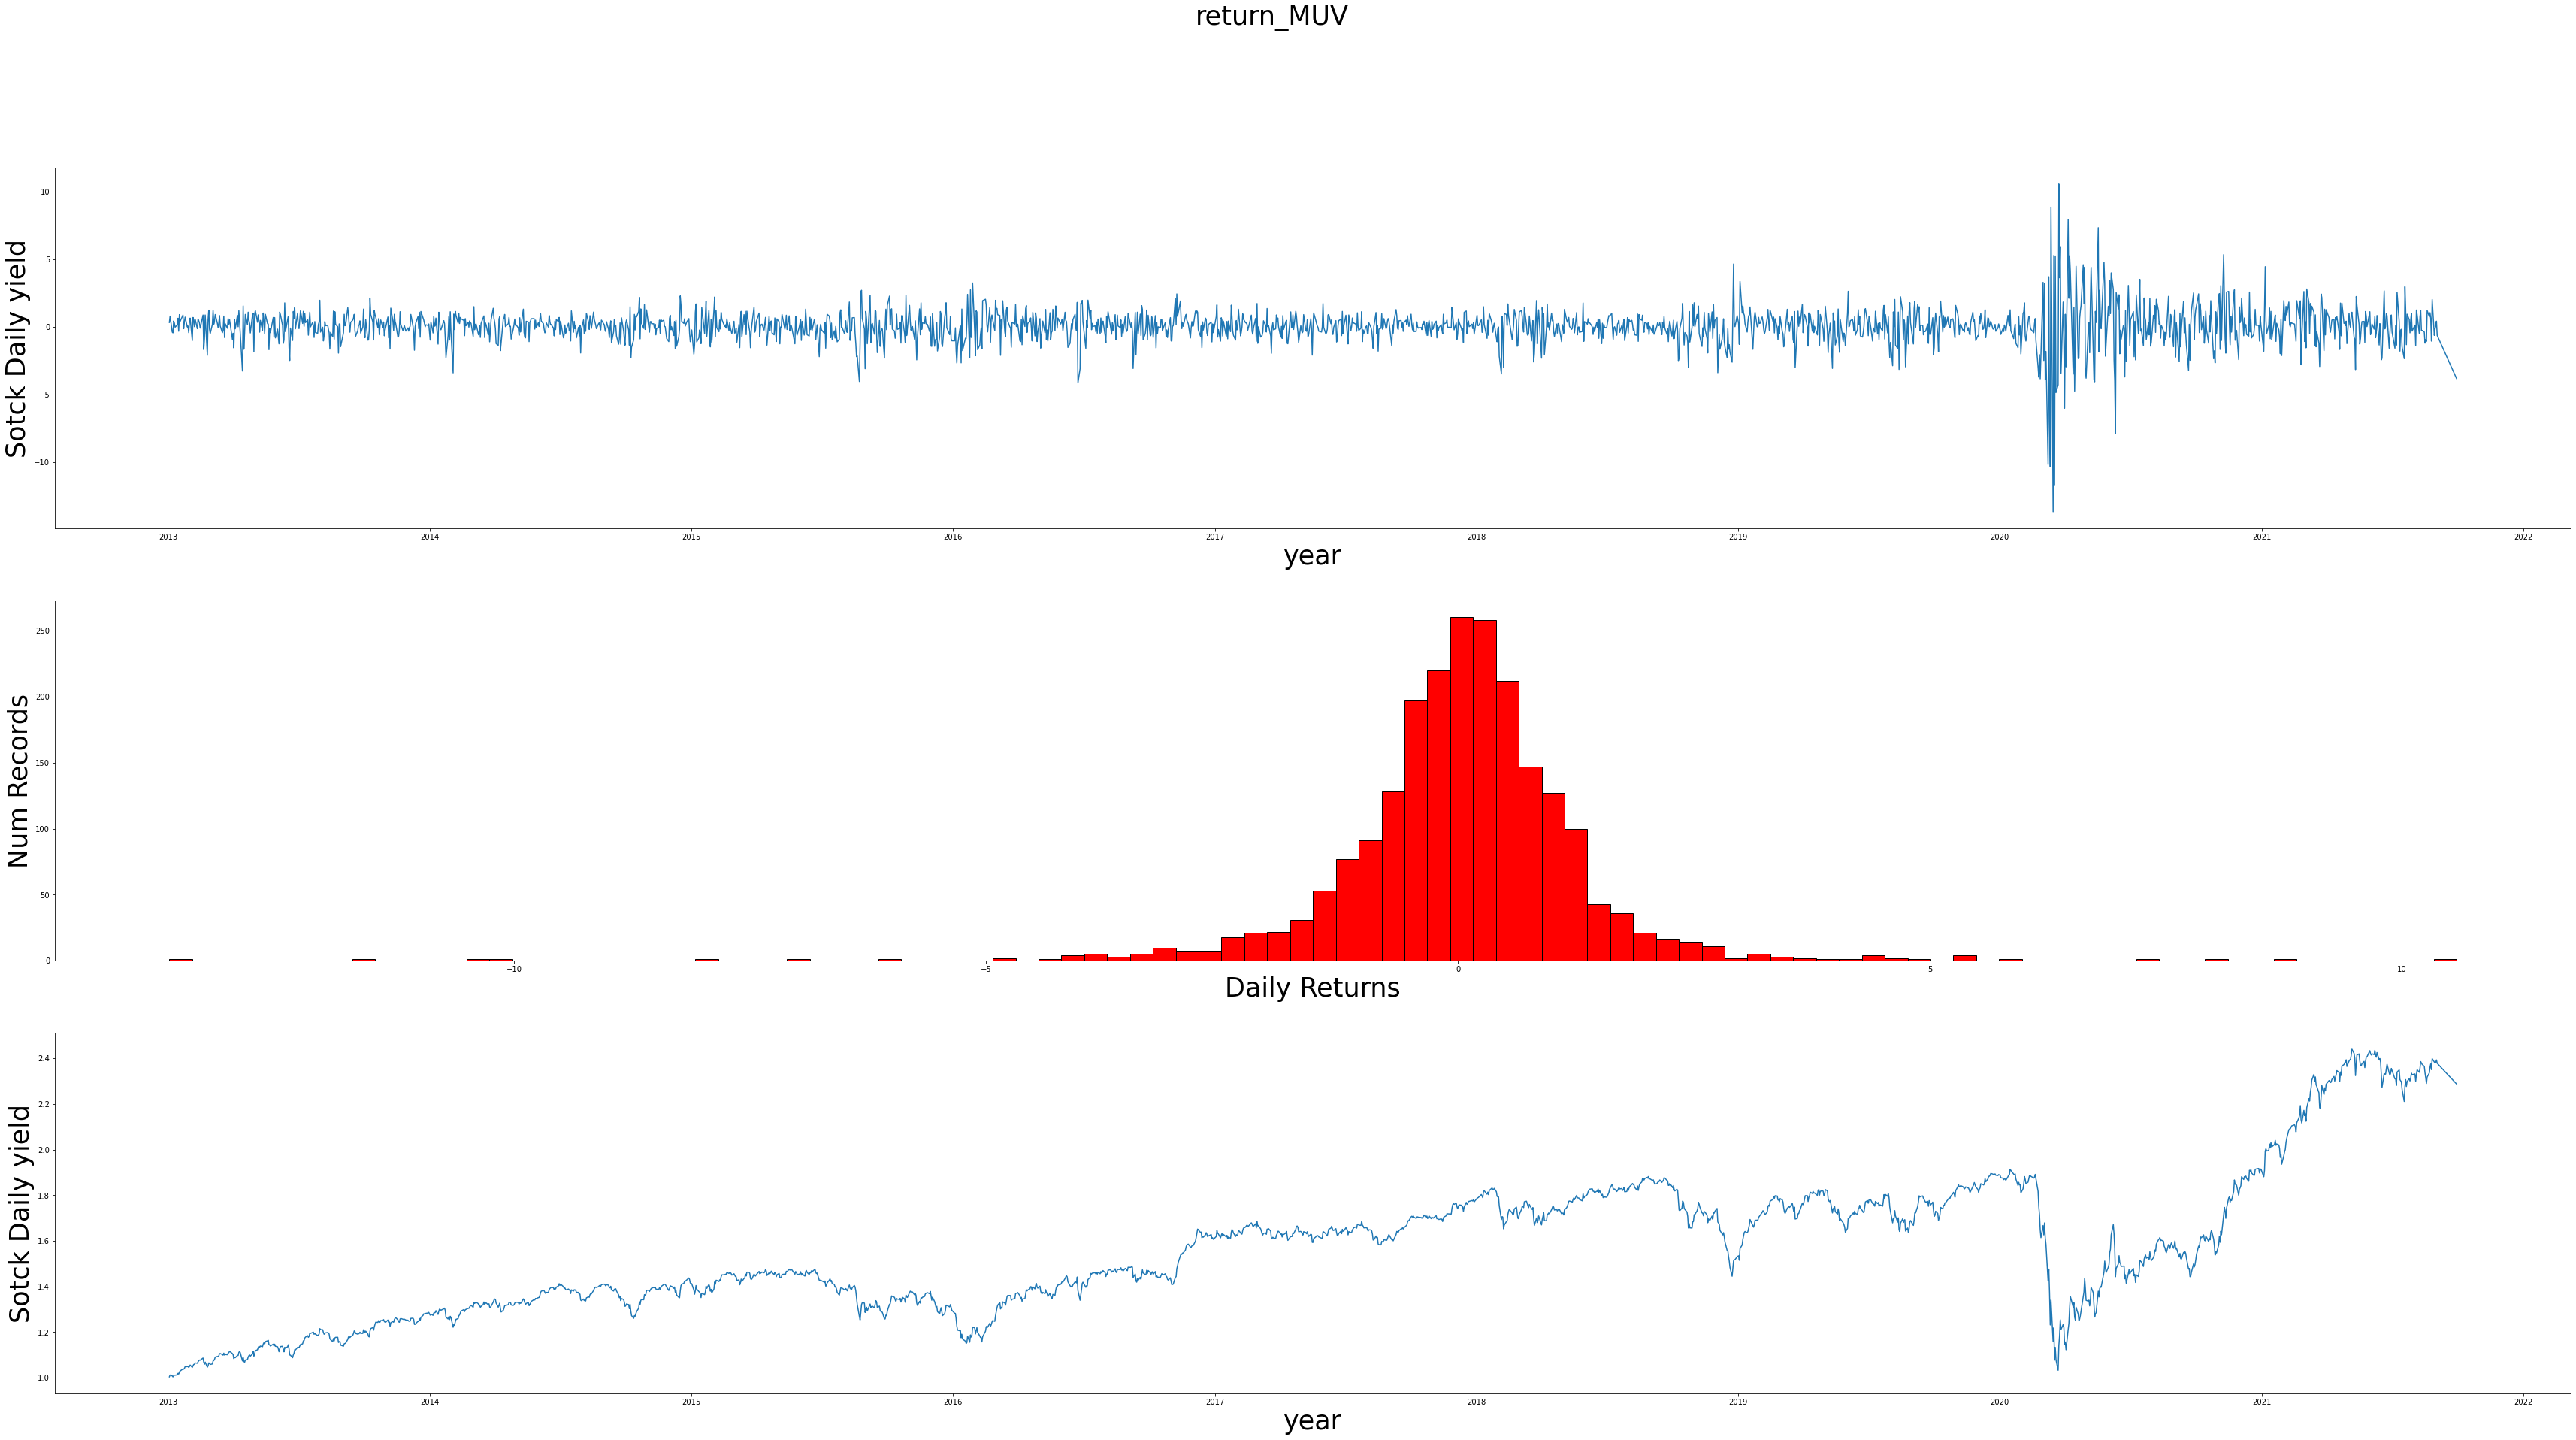

[*********************100%***********************]  1 of 1 completed


In [46]:
index = 0
stats_record = {}

for stock_name in returns.columns:

  fig, axs = plt.subplots(3)
  fig.suptitle(stock_name, fontsize=35)
  fig.set_figheight(30)
  fig.set_figwidth(60)
  # calculate 
  #Q1.A
  #graphs

  axs[0].plot(returns.index, returns[stock_name].multiply(100))
  axs[0].set_xlabel('year', fontsize=35)
  axs[0].set_ylabel('Sotck Daily yield', fontsize=35)
  
  axs[1].hist(returns[stock_name].multiply(100), color = 'red', edgecolor = 'black',bins = 100)
  axs[1].set_xlabel('Daily Returns', fontsize=35)
  axs[1].set_ylabel('Num Records', fontsize=35)
#trends
  trends=[]
  current_val = 1 
  for i in returns[stock_name]:
    current_val *= (1 + i)
    trends.append(current_val)
  axs[2].plot(returns.index, trends)
  axs[2].set_xlabel('year', fontsize=35)
  axs[2].set_ylabel('Sotck Daily trend', fontsize=35)
  plt.show()
  
  #calculate daily stats
  stats_record[stock_name]= {"mean_day": np.mean(returns[stock_name]) ,"std_day" : np.std(returns[stock_name])}

  # calculate yearly stats
  data = yfinance.download(portfolio_composition[index],"2013-01-01","2021-12-31")
  index+=1
  years = [str(i) for i in range (2013, 2022)]
  year_values = []
  for year in years:
      try:
        head = data["Open"][year].head()[0]
        tail = data["Open"][year].tail()[0]
        year_values.append((((tail/head) - 1.0))*100.0)
      except:
        pass
  stats_record[stock_name]["mean_year"] = np.mean(year_values)
  stats_record[stock_name]["std_year"] = np.std(year_values)

printing daily and yearly stats

In [5]:
index = 0 
for key in stats_record.keys():
  print("stats for {} stock:".format(portfolio_composition[index]))
  index+=1
  print(stats_record[key])

stats for BMY stock:
{'mean_day': 0.05451532932455091, 'std_day': 1.5701442089485715, 'mean_year': 9.112670747461802, 'std_year': 22.513233294184072}
stats for CVS stock:
{'mean_day': 0.0459370667813934, 'std_day': 1.540669186091509, 'mean_year': 11.062171594783592, 'std_year': 24.27321935148544}
stats for DAL stock:
{'mean_day': 0.09108545538249649, 'std_day': 2.4956449337882174, 'mean_year': 21.84110071639291, 'std_year': 46.38186507767059}
stats for FB stock:
{'mean_day': 0.14228248747124855, 'std_day': 2.1445721675463743, 'mean_year': 37.80652598441405, 'std_year': 36.4950660498044}
stats for UG stock:
{'mean_day': 0.03271285715000117, 'std_day': 2.244086283851244, 'mean_year': -0.6830396371790448, 'std_year': 21.45971237909368}
stats for SWKS stock:
{'mean_day': 0.13075479918896135, 'std_day': 2.4254974063933368, 'mean_year': 34.19428876746416, 'std_year': 53.6748976775707}
stats for MUV stock:
{'mean_day': 0.04640766734219122, 'std_day': 1.2979193914952243, 'mean_year': 11.368628

Cov Matrix 

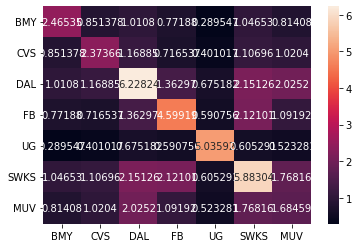

In [6]:
returns_trans = returns.transpose()
covMatrix = np.cov(returns_trans,bias=True)
labels = list(map(lambda x: x.split('_')[1], returns.columns))
sn.heatmap(covMatrix, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)
plt.rcParams["figure.figsize"]=(10, 3)
plt.show()


Correlation between trading days

In [7]:
stock_date_corr = []
for stock_name in returns:
    df_current=pd.DataFrame({})
    df_current['original'] =returns[stock_name]
    df_current['shifted'] = df_current['original'].shift(periods=1)
    dates_corr = df_current.corr()
    stock_date_corr.append(dates_corr)
    print('The correlation between trading days for {} stock is {}'.format(stock_name, dates_corr['original']['shifted']))
    print(dates_corr)
    print('##############################################################################################')

The correlation between trading days for return_BMY stock is -0.02646206911389714
          original   shifted
original  1.000000 -0.026462
shifted  -0.026462  1.000000
##############################################################################################
The correlation between trading days for return_CVS stock is -0.04462581264825483
          original   shifted
original  1.000000 -0.044626
shifted  -0.044626  1.000000
##############################################################################################
The correlation between trading days for return_DAL stock is 0.0626512528158443
          original   shifted
original  1.000000  0.062651
shifted   0.062651  1.000000
##############################################################################################
The correlation between trading days for return_FB stock is -0.046777485535406574
          original   shifted
original  1.000000 -0.046777
shifted  -0.046777  1.000000
#########################################

### Question number 2 

In [8]:
trading_days = 253 
artificial_dfs_number = 200 
years_of_leumi_investment = 3.5
total_trading_days = int(trading_days * years_of_leumi_investment)
returns = get_data()
window_size = 9
windows_num = int(total_trading_days/window_size) + 1
print("trading days : {} window size is : {} and windows num for trading time is : {}".format(total_trading_days, window_size, windows_num))

trading days : 885 window size is : 9 and windows num for trading time is : 99


2.A

In [9]:
#spliting the df into bins
bins_dfs = np.array_split(returns, len(returns)/ window_size)
def get_different_dfs(bins_df, size, aritifical_dfs_num):
   return [np.random.choice(bins_dfs,size=size, replace=False) for i in range(aritifical_dfs_num)]

def calculate_returns_in_the_end_of_artificial_time(df_list):
  res = {'return_BMY':1,'return_CVS':1,'return_DAL':1,'return_FB':1,'return_UG':1,'return_SWKS':1,'return_MUV':1}
  for curr_df in df_list:
    for stock_name in res.keys():
      for curr_stock_val in curr_df[stock_name]:
        res[stock_name]*= (1 + curr_stock_val)
  #fixing the profit.
  # for stock_name in res.keys():
  #   res[stock_name] -= 1 
  return res 

def get_profits_from_artificial_dfs_list(artificial_dfs):
  return [calculate_returns_in_the_end_of_artificial_time(df) for df  in artificial_dfs]

def get_profit_for_each_aritificical_window(dfs_list):
  res=[]
  for df in dfs_list:
    invested_val = 7
    current_val = sum(df.values())
    returns = ((current_val-invested_val)/invested_val) * 100
    res.append(returns)
  return res

def get_in_boundes_number(profits,lower_bound, upper_bound):
  count = 0
  for profit in profits:
    if lower_bound<=profit<=upper_bound:
      count+=1
  return count

In [19]:
artificial_dfs_200 = list(get_different_dfs(bins_dfs, windows_num, artificial_dfs_number))
profit_dfs_dicts = get_profits_from_artificial_dfs_list(artificial_dfs_200)
profits_each_window = get_profit_for_each_aritificical_window(profit_dfs_dicts)
#chance to 0%
print(get_in_boundes_number(profits_each_window,0,0)/200)
#chance to 2%
print(get_in_boundes_number(profits_each_window,2,2)/200)
# #chance to 2-20%
print(get_in_boundes_number(profits_each_window,2,20)/200)
# #chance to 20-32%
print(get_in_boundes_number(profits_each_window,20,32)/200)
# median 
print(np.median(profits_each_window))
#confidence interval
print(st.t.interval(alpha=0.95, df=len(profits_each_window)-1, loc=np.mean(profits_each_window), scale=st.sem(profits_each_window)))
#to 3.1.2022 there are 424 trading days.
total_trading_days = 424
windows_num = int(total_trading_days/window_size) + 1
artificial_dfs_200 = list(get_different_dfs(bins_dfs, windows_num, artificial_dfs_number))
profit_dfs_dicts = get_profits_from_artificial_dfs_list(artificial_dfs_200)
profits_each_window = get_profit_for_each_aritificical_window(profit_dfs_dicts)
expected_value = 100000 + 100000 * np.mean(profits_each_window)/100
print("exptected the stocks value untill 3.1.2022 is {}".format(expected_value))
total_trading_days = int(trading_days * years_of_leumi_investment)
windows_num = int(total_trading_days/window_size) + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


0.0
0.0
0.045
0.025
91.1196205022868
(92.00310076525028, 107.87651608769542)
exptected the stocks value untill 3.1.2022 is 137334.25824847023


2.B

In [20]:
def calculate_returns_in_the_end_of_artificial_time_for_structure_deposit(df_list):
  res = {'return_BMY':1,'return_CVS':1,'return_DAL':1,'return_FB':1,'return_UG':1,'return_SWKS':1,'return_MUV':1}
  stocks_to_pass = set()
  for curr_df in df_list:
    for stock_name in res.keys():
      if stock_name in stocks_to_pass:
        continue
      for curr_stock_val in curr_df[stock_name]:
        if curr_stock_val > 0.32:
          res[stock_name]= 1.02
          stocks_to_pass.add(stock_name)
        res[stock_name]*= (1 + curr_stock_val)

  for stock_name in res.keys():
    if res[stock_name] < 1 :
      res[stock_name] = 1
    elif res[stock_name]> 1.32:
      res[stock_name]= 1.02
  return res

def get_profits_from_artificial_dfs_list_structure_deposit(artificial_dfs):
  return [calculate_returns_in_the_end_of_artificial_time_for_structure_deposit(df) for df  in artificial_dfs]


In [22]:
artificial_dfs_200 = list(get_different_dfs(bins_dfs, windows_num, artificial_dfs_number))
profit_dfs_dicts = get_profits_from_artificial_dfs_list_structure_deposit(artificial_dfs_200)
profits_each_window = get_profit_for_each_aritificical_window(profit_dfs_dicts)
#chance to 0%
print(get_in_boundes_number(profits_each_window,0,0)/200)
#chance to 2%
print(get_in_boundes_number(profits_each_window,2,2)/200)
# #chance to 2-20%
print(get_in_boundes_number(profits_each_window,2,20)/200)
# #chance to 20-32%
print(get_in_boundes_number(profits_each_window,20,32)/200)
# median 
print(np.median(profits_each_window))
#confidence interval
print(st.t.interval(alpha=0.95, df=len(profits_each_window)-1, loc=np.mean(profits_each_window), scale=st.sem(profits_each_window)))
#to 3.1.2022 there are 424 trading days.
total_trading_days = 424
windows_num = int(total_trading_days/window_size) + 1
artificial_dfs_200 = list(get_different_dfs(bins_dfs, windows_num, artificial_dfs_number))
profit_dfs_dicts = get_profits_from_artificial_dfs_list_structure_deposit(artificial_dfs_200)
profits_each_window = get_profit_for_each_aritificical_window(profit_dfs_dicts)
expected_value = 100000 + 100000 * np.mean(profits_each_window)/100
print("exptected the stocks value untill 3.1.2022 is {}".format(expected_value))
total_trading_days = int(trading_days * years_of_leumi_investment)
windows_num = int(total_trading_days/window_size) + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


0.0
0.0
0.7
0.0
4.235473824162105
(4.063687343984147, 4.831320757946101)
exptected the stocks value untill 3.1.2022 is 105271.60759747785


## 2.C Sensitivty check

compartion to 2.A

In [24]:
artificial_dfs_200 = list(get_different_dfs(bins_dfs, windows_num, artificial_dfs_number))
profit_dfs_dicts = get_profits_from_artificial_dfs_list(artificial_dfs_200)
profits_each_window = get_profit_for_each_aritificical_window(profit_dfs_dicts)
#chance to 0%
print(get_in_boundes_number(profits_each_window,0,0)/200)
#chance to 2%
print(get_in_boundes_number(profits_each_window,2,2)/200)
# #chance to 2-20%
print(get_in_boundes_number(profits_each_window,2,20)/200)
# #chance to 20-32%
print(get_in_boundes_number(profits_each_window,20,32)/200)
# median 
print(np.median(profits_each_window))
#confidence interval
print(st.t.interval(alpha=0.95, df=len(profits_each_window)-1, loc=np.mean(profits_each_window), scale=st.sem(profits_each_window)))
#to 3.1.2022 there are 424 trading days.
total_trading_days = 424
windows_num = int(total_trading_days/window_size) + 1
artificial_dfs_200 = list(get_different_dfs(bins_dfs, windows_num, artificial_dfs_number))
profit_dfs_dicts = get_profits_from_artificial_dfs_list(artificial_dfs_200)
profits_each_window = get_profit_for_each_aritificical_window(profit_dfs_dicts)
expected_value = 100000 + 100000 * np.mean(profits_each_window)/100
print("exptected the stocks value untill 3.1.2022 is {}".format(expected_value))
total_trading_days = int(trading_days * years_of_leumi_investment)
windows_num = int(total_trading_days/window_size) + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


0.0
0.0
0.04
0.04
91.42663341903045
(88.45733681554691, 104.9391613042144)
exptected the stocks value untill 3.1.2022 is 138584.95301755733


compartion to 2.B

In [25]:
artificial_dfs_200 = list(get_different_dfs(bins_dfs, windows_num, artificial_dfs_number))
profit_dfs_dicts = get_profits_from_artificial_dfs_list_structure_deposit(artificial_dfs_200)
profits_each_window = get_profit_for_each_aritificical_window(profit_dfs_dicts)
#chance to 0%
print(get_in_boundes_number(profits_each_window,0,0)/200)
#chance to 2%
print(get_in_boundes_number(profits_each_window,2,2)/200)
# #chance to 2-20%
print(get_in_boundes_number(profits_each_window,2,20)/200)
# #chance to 20-32%
print(get_in_boundes_number(profits_each_window,20,32)/200)
# median 
print(np.median(profits_each_window))
#confidence interval
print(st.t.interval(alpha=0.95, df=len(profits_each_window)-1, loc=np.mean(profits_each_window), scale=st.sem(profits_each_window)))
#to 3.1.2022 there are 424 trading days.
total_trading_days = 424
windows_num = int(total_trading_days/window_size) + 1
artificial_dfs_200 = list(get_different_dfs(bins_dfs, windows_num, artificial_dfs_number))
profit_dfs_dicts = get_profits_from_artificial_dfs_list_structure_deposit(artificial_dfs_200)
profits_each_window = get_profit_for_each_aritificical_window(profit_dfs_dicts)
expected_value = 100000 + 100000 * np.mean(profits_each_window)/100
print("exptected the stocks value untill 3.1.2022 is {}".format(expected_value))
total_trading_days = int(trading_days * years_of_leumi_investment)
windows_num = int(total_trading_days/window_size) + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


0.0
0.0
0.705
0.0
4.070587690706569
(4.265436284883571, 5.1041070636180494)
exptected the stocks value untill 3.1.2022 is 105728.14784826715


### Question number 3

----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 0.28
Annualized Volatility: 0.24


--Allocation at max Sharpe ratio--

stock return_BMY allocation is  allocation    10.16
Name: return_BMY, dtype: float64.
stock return_CVS allocation is  allocation    9.36
Name: return_CVS, dtype: float64.
stock return_DAL allocation is  allocation    15.15
Name: return_DAL, dtype: float64.
stock return_FB allocation is  allocation    43.29
Name: return_FB, dtype: float64.
stock return_UG allocation is  allocation    0.15
Name: return_UG, dtype: float64.
stock return_SWKS allocation is  allocation    19.28
Name: return_SWKS, dtype: float64.
stock return_MUV allocation is  allocation    2.62
Name: return_MUV, dtype: float64.
----------------------------------------------------------------------------------------------------


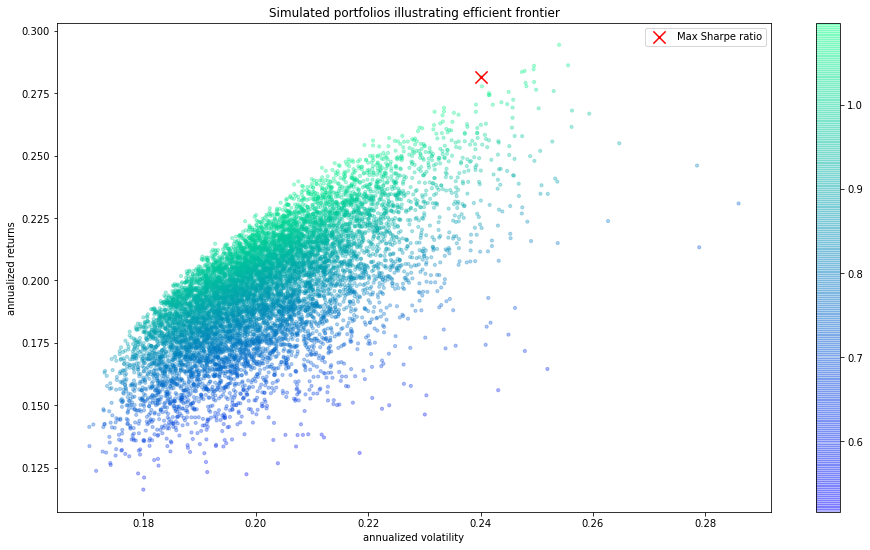

In [73]:
returns = get_data()
mean_returns = returns.mean()
cov_matrix = returns.cov()
# Number of portfolios to simulate
num_portfolios = 10000
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates
risk_free_rate = 0.018

# Define function to calculate returns, volatility
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
  # Given the avg returns, weights of equities calc. the portfolio return
  returnns = np.sum(mean_returns*weights ) *252
  # Standard deviation of portfolio (using dot product against covariance, weights)
  # 252 trading days
  std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
  return std, returnns

def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
# Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
  results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
  weight_array = []
  for i in range(num_portfolios):
        # Randomly assign floats to our 7 equities
        weights = np.random.random(7)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
  return results, weight_array


def display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate):

    # pull results, weights from random portfolios
  results, weights = generate_random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate) 
    # pull the max portfolio Sharpe ratio (3rd element in results array from 
    # generate_random_portfolios function)
  max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
  stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
  max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=returns.columns,columns=['allocation'])
  max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
  max_sharpe_allocation = max_sharpe_allocation.T
    
  print("-"*100)
  print("Portfolio at maximum Sharpe Ratio\n")
  print("--Returns, volatility--\n")
  print("Annualized Return:", round(returns_portfolio,2))
  print("Annualized Volatility:", round(stdev_portfolio,2))
    
  print("\n")
  print("--Allocation at max Sharpe ratio--\n")
  for i in max_sharpe_allocation:
    print("stock {} allocation is  {}.".format(i,max_sharpe_allocation[i]))
  print("-"*100)
    
  plt.figure(figsize=(16, 9))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
  plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
  plt.colorbar()
    # Mark the portfolio w/ max Sharpe ratio
  plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
  plt.title('Simulated portfolios illustrating efficient frontier')
  plt.xlabel('annualized volatility')
  plt.ylabel('annualized returns')
  plt.legend(labelspacing=1.2)

display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate)
